In [3]:
#######################
# Interpolates some f #
#######################
import radiant as rad
import numpy as np


# Problem Parameters
a = 0
b = 1


def f(x):
    return np.cos((2 * np.pi * x / (b - a)) ** 2) * 2 * np.pi * x / (b - a)

In [4]:
# Parameters
d = 1
k = 1
levels = 10
start_ncentres = 10
start_delta = 0.1

# Computed parameters
phi = rad.phi_factory(d, k)
thinning = 2. ** np.arange(0, levels)
centres = [np.arange(a, b + inc, inc) for inc in (b - a) / (thinning * start_ncentres)]
delta = start_delta / thinning

# Integration
error_integrator = rad.integrate.LeggaussIntegrator(a, b, 500)

# Solve for approximate solution
approx, _ = rad.multilevel.solve(f, centres, delta, phi, rad.interpolate.solve)
error = rad.error(f, approx, error_integrator)

print("L2 Relative Error:", error)

L2 Relative Error: 0.00031619623393906813


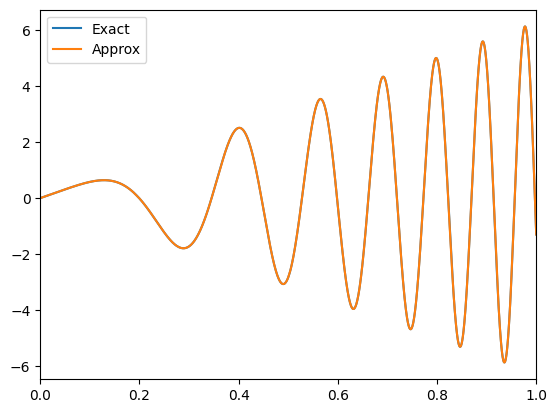

In [5]:
rad.plot.many(a, b, f, approx, n=5000, labels=["Exact", "Approx"])

In [6]:
from IPython.display import HTML


anim = rad.animate.ml_animate(f, approx, a, b, 2000)
HTML(anim.to_jshtml())

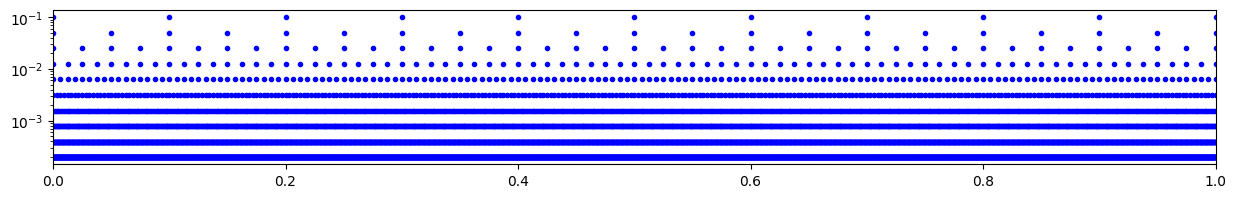

In [7]:
rad.plot.thinning(centres, delta, figsize=(15, 2))